In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import scipy.optimize as opt


In [3]:
def reflectivity(x,r,c):    
    return 1-(np.tan(x-np.arcsin(r*np.sin(x))))**2/(np.tan(x+np.arcsin(r*np.sin(x))))**2
def glassIndex(x,r,c):
     return (np.tan(x-np.arcsin(r*np.sin(x))))**2/(np.tan(x+np.arcsin(r*np.sin(x))))**2 
def smooth(data,num):   
    for i in range(num):
        for i in range(len(data)-1):data[i]=(data[i]+data[i+1])/2    
    return data     

In [21]:
#brew = np.loadtxt('brewster.csv',delimiter=',')

brew1 = np.transpose(np.loadtxt('maybe_brewster_BBD.csv',delimiter=',')) 

brew = brew1[0][:170]

brewster1 = 57.6
brewster2 = 56.9

In [5]:
smooth(brew[:170],1)

maximum = np.ndarray.tolist(brew[:100]).index(max(brew[100:170]))
Angle_0 = np.ndarray.tolist(brew[:100]).index(max(brew[100:170]))



In [6]:


fit = np.array(brew)
maxBrew = np.max(fit) 
normalizedFit = fit/maxBrew 
normalizedRFit = 1-normalizedFit 
brewster = 57 
errorBrew = 1

y = normalizedRFit

x = np.linspace(0,np.pi/2,len(y))

para,cov =  opt.curve_fit(glassIndex,x[:len(y)],y[:len(y)],[1/1.5,1/2]) 


para1,cov1 = opt.curve_fit(reflectivity,x[:len(normalizedFit)],normalizedFit[:len(normalizedFit)],[1/1.5,1])

C:\Users\jemwr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\jemwr\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\jemwr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


C:\Users\jemwr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\jemwr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


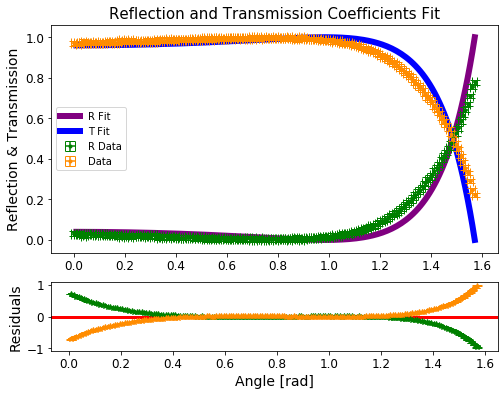

In [7]:


f, [a1,a2] = plt.subplots(2,1,gridspec_kw ={'height_ratios':[1,0.3]},    figsize=(8,6)) 

a1.plot(x,glassIndex(x,para[0],para[1]),'-',color='purple',linewidth=6,label='R Fit')
a1.plot(x,reflectivity(x,para1[0],para1[1]),'-',color='blue',linewidth=6,label='T Fit') 

a1.errorbar(x,y,fmt='.',xerr=0.01,yerr=2/1023+0.01,capsize=5,color='green',label="R Data") 
a1.errorbar(x,normalizedFit,fmt='.',xerr=0.01,yerr=1/1023+0.01,capsize=5,color='darkorange',label="Data")
a1.legend()
a1.tick_params(labelsize=12)

a1.set_ylabel("Reflection & Transmission", fontsize =14)
a1.set_title("Reflection and Transmission Coefficients Fit", fontsize = 15)
a2.set_xlabel("Angle [rad]", fontsize = 14)

d1 = np.flip(y)-glassIndex(x,para[0],para[1]) 
d2 = np.flip(normalizedFit)-reflectivity(x,para1[0],para1[1]) 
a2.errorbar(x,d1,yerr=2/1023+0.01,fmt='*',capsize=5,color='green') 

a2.errorbar(x,d2,yerr=2/1023+0.01,fmt='*',capsize=5,color='darkorange') 
a2.axhline(0,color='red',linewidth=3) 
a2.set_ylabel("Residuals", fontsize = 14)
a2.tick_params(labelsize=12)

plt.show()


In [19]:
print ("chi value of the fit is", (sci.chisquare(np.flip(y))))

chi value of the fit is Power_divergenceResult(statistic=51.46899954750841, pvalue=1.0)


In [24]:
Brewster = (brewster1+brewster2)/2 
err = np.sqrt(1**2+0.4**2) 
print ("The final brewster angle is: ", round(Brewster,0)," with error of ", round(err,0))


The final brewster angle is:  57.0  with error of  1.0


0.5
